In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [3]:
df=pd.read_csv('/data/notebook_files/Dry_Bean_Dataset-use.csv')
df.head()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [4]:
df.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
 dtype=object)

In [5]:
dd=pd.get_dummies(df,columns=['Class'])

In [6]:
y=pd.DataFrame({'BARBUNYA':dd.Class_BARBUNYA,
               'SEKER':dd.Class_SEKER,
               'BOMBAY':dd.Class_BOMBAY,
               'CALI':dd.Class_CALI,
               'HOROZ':dd.Class_HOROZ,
               'DERMASON':dd.Class_DERMASON})

In [7]:
X=df.drop('Class',axis=1)

In [8]:
from sklearn.model_selection import train_test_split


from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X =pd.DataFrame(sc_x.fit_transform(X))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

In [9]:
#from tensorflow import

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=16),
    tf.keras.layers.Dense(24, activation=tf.nn.leaky_relu,kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(units=6, activation=tf.nn.softmax)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 24)                408       
                                                                 
 dense_1 (Dense)             (None, 6)                 150       
                                                                 
Total params: 558
Trainable params: 558
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.fit(X_train,y_train,epochs=16,batch_size=32)

Epoch 1/16
383/383 [==============================] - 1s 1ms/step - loss: 0.7438 - accuracy: 0.6757
Epoch 2/16
383/383 [==============================] - 1s 1ms/step - loss: 0.3474 - accuracy: 0.7795
Epoch 3/16
383/383 [==============================] - 1s 1ms/step - loss: 0.4678 - accuracy: 0.7811
Epoch 4/16
383/383 [==============================] - 1s 1ms/step - loss: 1.0775 - accuracy: 0.7823
Epoch 5/16
383/383 [==============================] - 1s 1ms/step - loss: 2.2733 - accuracy: 0.7791
Epoch 6/16
383/383 [==============================] - 1s 1ms/step - loss: 4.0833 - accuracy: 0.7789
Epoch 7/16
383/383 [==============================] - 1s 1ms/step - loss: 6.3608 - accuracy: 0.7780
Epoch 8/16
383/383 [==============================] - 1s 1ms/step - loss: 9.0637 - accuracy: 0.7792
Epoch 9/16
383/383 [==============================] - 1s 1ms/step - loss: 12.2306 - accuracy: 0.7794
Epoch 10/16
383/383 [==============================] - 1s 1ms/step - loss: 15.6061 - accuracy: 0.78

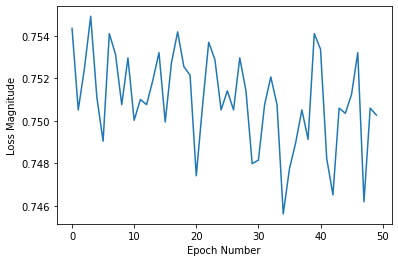

In [13]:
h=model.fit(X_train, y_train, epochs=50, verbose=False)
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(h.history['accuracy'])